In [ ]:
!pip install import-ipynb

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Model
from keras.layers import Input
from sklearn.utils import shuffle
from keras.layers import Dense
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"
import import_ipynb
from model_functions import *

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
importing Jupyter notebook from model_functions.ipynb


In [ ]:

data = np.load('/content/drive/My Drive/ready_data_6C/input/1.npy')   # 这里导入需要的百分比  这里用的是100% ，9  代表90% 。。。。。
label = np.load('/content/drive/My Drive/ready_data_6C/output/output.npy')


In [ ]:
print(data.shape)
print(label.shape)

(96, 6, 6786)
(96, 3)


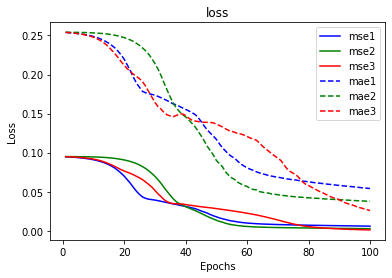

In [ ]:
data, label = shuffle(data, label)    #打乱 取72做trainning  
split = 72
train_data = data[:split]
train_label = label[:split]
test_data = data[split:]
test_label = label[split:]

train_data1=train_data[:,0,:]
train_data2=train_data[:,1,:]
train_data3=train_data[:,2,:]
train_data4=train_data[:,3,:]
train_data5=train_data[:,4,:]
train_data6=train_data[:,5,:]

from model_functions import *
model3 = get_model3()
model1 = get_model1()
model2 = get_model2()

history1 = model1.fit([train_data1,train_data2,train_data3,train_data4,train_data5,train_data6], train_label, epochs=100,verbose= 0)
history2 = model2.fit([train_data1,train_data2,train_data3,train_data4,train_data5,train_data6], train_label, epochs=100,verbose= 0)
history3 = model3.fit([train_data1,train_data2,train_data3,train_data4,train_data5,train_data6], train_label, epochs=100,verbose= 0)

mse1 = history1.history['loss']
mse2 = history2.history['loss']
mse3 = history3.history['loss']
mae1 = history1.history['mean_absolute_error']
mae2 = history2.history['mean_absolute_error']
mae3 = history3.history['mean_absolute_error']
# val_loss = history.history['val_loss']
# acc = history.history['acc']
# val_acc=history.history['val_acc']
epochs = range(1,len(mse1) +1)
plt.plot(epochs, mse1, 'b', label='mse1')
plt.plot(epochs, mse2, 'g', label='mse2')
plt.plot(epochs, mse3, 'r', label='mse3')
plt.plot(epochs, mae1, 'b--', label='mae1')
plt.plot(epochs, mae2, 'g--', label='mae2')
plt.plot(epochs, mae3, 'r--', label='mae3')


plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [ ]:
m1 = []
m2 = []
m3 = []
for i in range(24):
  new = 0
  test_data1=test_data[i,0,:].reshape(1,6786)
  test_data2=test_data[i,1,:].reshape(1,6786)
  test_data3=test_data[i,2,:].reshape(1,6786)
  test_data4=test_data[i,3,:].reshape(1,6786)
  test_data5=test_data[i,4,:].reshape(1,6786)
  test_data6=test_data[i,5,:].reshape(1,6786)  

  newx = [test_data1,test_data2,test_data3,test_data4,test_data5,test_data6]
  m1.append(model1.predict(newx))
  m2.append(model2.predict(newx))
  m3.append(model3.predict(newx))
m1 = np.array(m1)
m2 = np.array(m2)
m3 = np.array(m3)
m1 = np.reshape(m1,(24,3))
m2 = np.reshape(m2,(24,3))
m3 = np.reshape(m3,(24,3))


In [ ]:
# x_data = range(24)
# y_data_c1 = test_label[:,0]  
# y_data_c2 = test_label[:,1]
# y_data_c3 = test_label[:,2]
# y_predict1_c1 = m1[:,0]
# y_predict1_c2 = m1[:,1]
# y_predict1_c3 = m1[:,2]
# y_predict2_c1 = m2[:,0]
# y_predict2_c2 = m2[:,1]
# y_predict2_c3 = m2[:,2]
# y_predict3_c1 = m3[:,0]
# y_predict3_c2 = m3[:,1]
# y_predict3_c3 = m3[:,2]

# plt.plot(x_data, y_data_c1 , 'c', label='c1')
# plt.plot(x_data, y_data_c2 , 'r', label='c2')
# plt.plot(x_data, y_data_c3 , 'b', label='c3')
# plt.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
# plt.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
# plt.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
# plt.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
# plt.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
# plt.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
# plt.plot(x_data, y_predict3_c1 , 'c-.', label='predict3_c1')
# plt.plot(x_data, y_predict3_c2 , 'r-.', label='predict3_c2')
# plt.plot(x_data, y_predict3_c3 , 'b-.', label='predict3_c3')

# plt.legend(loc="upper right",fontsize = 'small',bbox_to_anchor=(0.5, -0.05))

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show() 

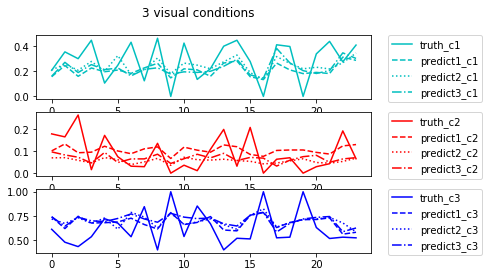

In [ ]:
x_data = range(24)
y_data_c1 = test_label[:,0]
y_data_c2 = test_label[:,1]
y_data_c3 = test_label[:,2]
y_predict1_c1 = m1[:,0]
y_predict1_c2 = m1[:,1]
y_predict1_c3 = m1[:,2]
y_predict2_c1 = m2[:,0]
y_predict2_c2 = m2[:,1]
y_predict2_c3 = m2[:,2]
y_predict3_c1 = m3[:,0]
y_predict3_c2 = m3[:,1]
y_predict3_c3 = m3[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots( 3)
fig.suptitle('3 visual conditions')


predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
predict_c1.plot(x_data, y_predict3_c1 , 'c-.', label='predict3_c1')
predict_c2.plot(x_data, y_predict3_c2 , 'r-.', label='predict3_c2')
predict_c3.plot(x_data, y_predict3_c3 , 'b-.', label='predict3_c3')

predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.savefig('/content/drive/My Drive/ready_data_6C/input/1.png' ,bbox_inches='tight')


In [ ]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  y_data_c1 = test_label[:,0]
  y_data_c2 = test_label[:,1]
  y_data_c3 = test_label[:,2]
  y_predict1_c1 = predict[:,0]
  y_predict1_c2 = predict[:,1]
  y_predict1_c3 = predict[:,2]
  tmp1 = 0
  tmp2 = 0
  tmp3 = 0
  for i in range(24):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1 /24 
  c2 = tmp2 /24
  c3 = tmp3 /24
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1 , c2 ,c3 


In [ ]:
Model1 = calculate_mse(m1)
Model2 = calculate_mse(m2)
Model3 = calculate_mse(m3)


In [ ]:
print(Model1)
print(Model2)
print(Model3)

(0.023000270939758913, 0.005818426904045593, 0.0290106035268765)
(0.017821132576622864, 0.006549265424481456, 0.030959285243438012)
(0.022243429152064176, 0.005621692206589211, 0.03348814555521359)
